In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('/content/sample_data/train.csv')
df_test = pd.read_csv('/content/sample_data/test.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_test.shape

(418, 11)

In [ ]:
df_train['Age'].isnull().sum()

177

In [ ]:
100 * df_train['Age'].isnull().sum()/df_train[df_train.columns].shape[0]

19.865319865319865

In [ ]:
for col in df_train.columns:
  msg = '{:>10} : \t Percentage of NaN: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
  print(msg)

PassengerId : 	 Percentage of NaN: 0.00%
  Survived : 	 Percentage of NaN: 0.00%
    Pclass : 	 Percentage of NaN: 0.00%
      Name : 	 Percentage of NaN: 0.00%
       Sex : 	 Percentage of NaN: 0.00%
       Age : 	 Percentage of NaN: 19.87%
     SibSp : 	 Percentage of NaN: 0.00%
     Parch : 	 Percentage of NaN: 0.00%
    Ticket : 	 Percentage of NaN: 0.00%
      Fare : 	 Percentage of NaN: 0.00%
     Cabin : 	 Percentage of NaN: 77.10%
  Embarked : 	 Percentage of NaN: 0.22%


In [ ]:
for col in df_test.columns:
  msg = '{:>10} : \t Percentage of NaN: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
  print(msg)

PassengerId : 	 Percentage of NaN: 0.00%
    Pclass : 	 Percentage of NaN: 0.00%
      Name : 	 Percentage of NaN: 0.00%
       Sex : 	 Percentage of NaN: 0.00%
       Age : 	 Percentage of NaN: 20.57%
     SibSp : 	 Percentage of NaN: 0.00%
     Parch : 	 Percentage of NaN: 0.00%
    Ticket : 	 Percentage of NaN: 0.00%
      Fare : 	 Percentage of NaN: 0.24%
     Cabin : 	 Percentage of NaN: 78.23%
  Embarked : 	 Percentage of NaN: 0.00%


In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

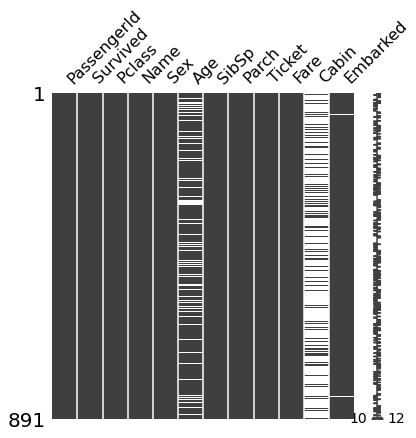

In [ ]:
msno.matrix(df=df_train, figsize=(6,6))
plt.show

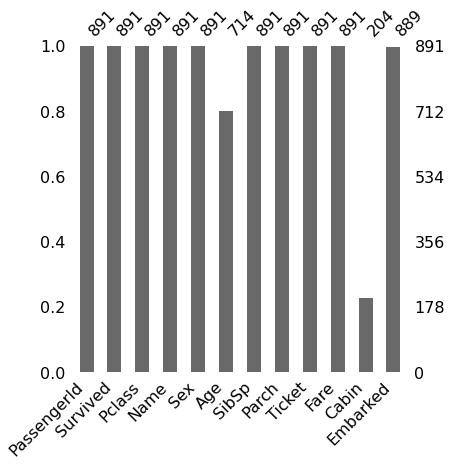

In [ ]:
msno.bar(df=df_train, figsize=(6,6))
plt.show()

In [ ]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

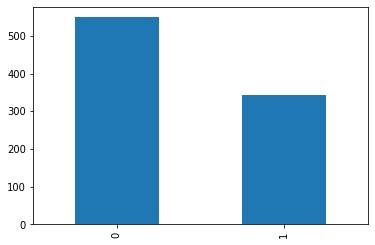

In [ ]:
df_train['Survived'].value_counts().plot.bar()

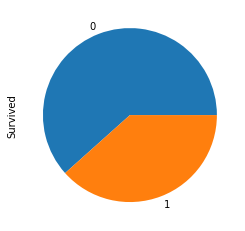

In [ ]:
df_train['Survived'].value_counts().plot.pie()
plt.show()

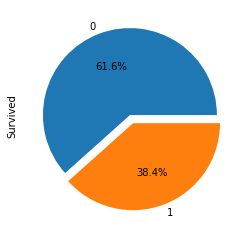

In [ ]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%')
plt.show()

In [ ]:
import seaborn as sns

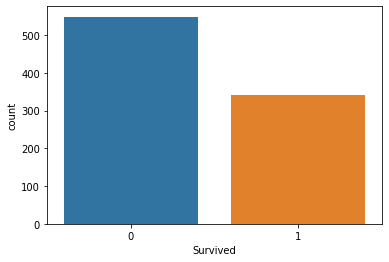

In [ ]:
sns.countplot(x='Survived', data=df_train)
plt.show()

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


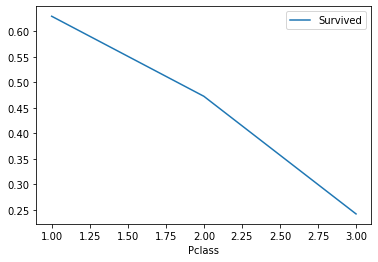

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot()

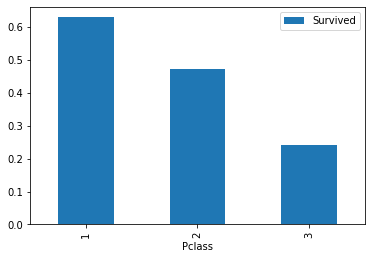

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

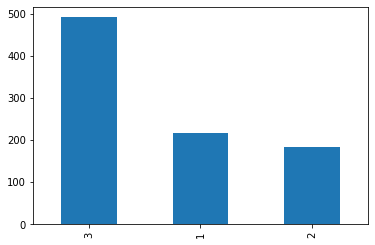

In [ ]:
df_train['Pclass'].value_counts().plot.bar()
plt.show()

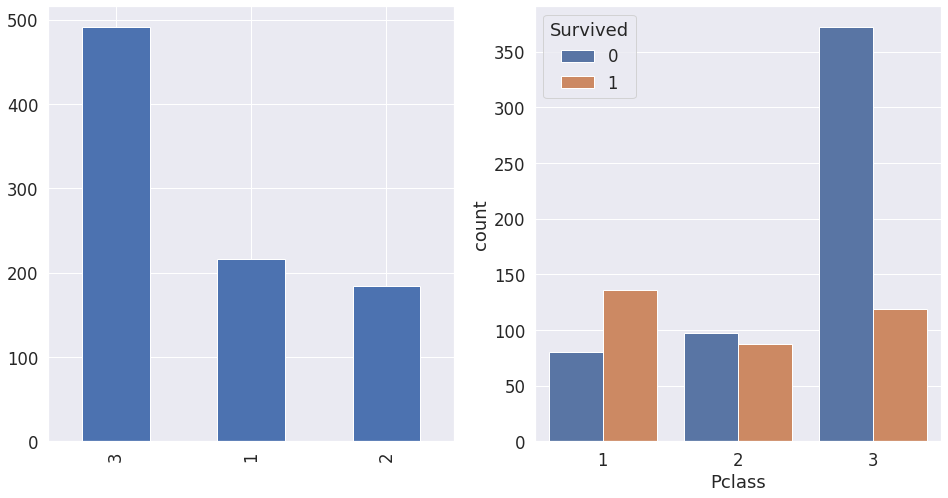

In [ ]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(1,2,figsize=(16,8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
plt.show()

In [ ]:
import numpy as np

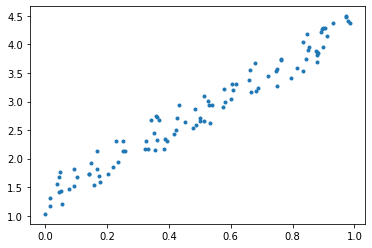

In [ ]:
x = np.random.rand(100)
eps = np.random.rand(100)/1.5
y = 3*x+1+eps

plt.plot(x,y,'.')
plt.show()

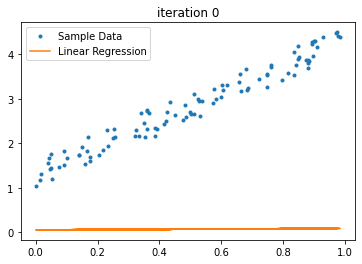

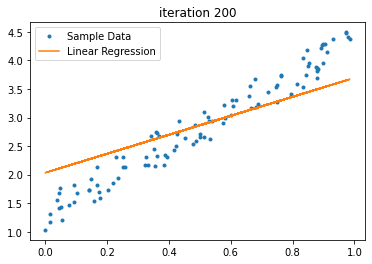

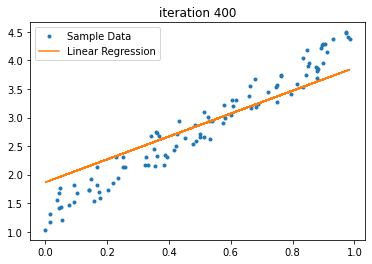

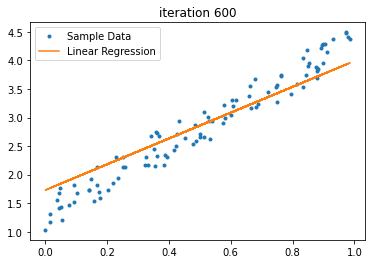

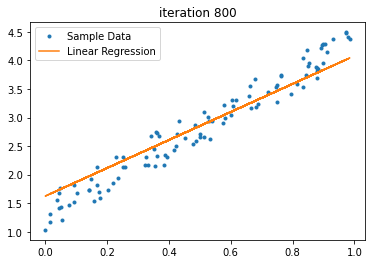

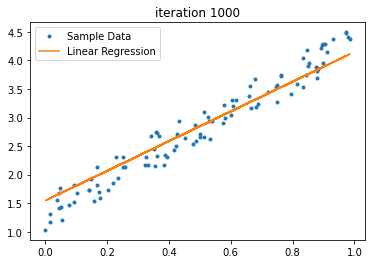

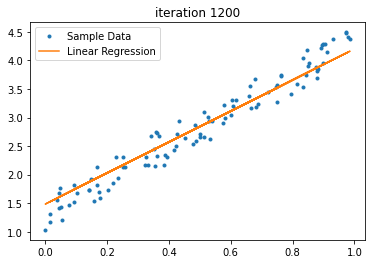

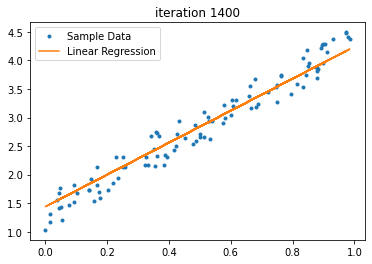

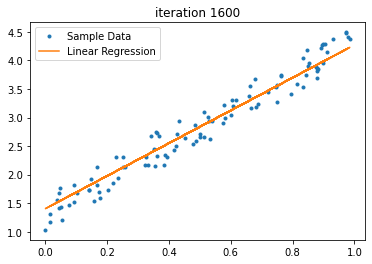

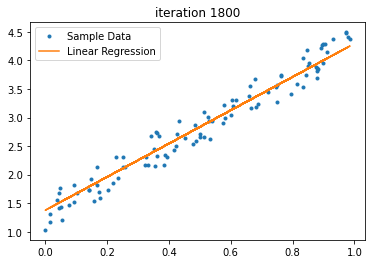

In [ ]:
a=0
b=0
alpha=0.01
n=100
err_evolve = []
it_index = []
for it in range(2000):
  delta_a=0
  delta_b=0
  err=0
  for i in range(n):
    delta_a = delta_a + 2*(a*x[i]+b-y[i])*x[i]
    delta_b = delta_b + 2*(a*x[i]+b-y[i])
    err = err + (a*x[i]+b-y[i])*(a*x[i]+b-y[i])/n
  a = a - alpha*delta_a/n
  b = b - alpha*delta_b/n

  err_evolve.append(err)
  it_index.append(it)
  if it%200==0:
    plt.plot(x,y,'.',x,a*x+b)
    plt.legend(labels=('Sample Data', 'Linear Regression'))
    plt.title('iteration %d' %it)
    plt. show()

In [ ]:
a

2.95546296410766

In [ ]:
b

1.3567288051931508

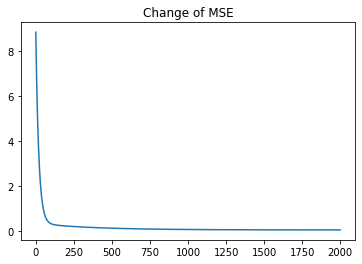

In [ ]:
plt.plot(it_index,err_evolve)
plt.title('Change of MSE')
plt.show()

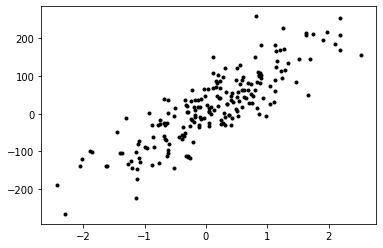

In [ ]:
from sklearn.datasets import make_regression
x,y,coeff = make_regression(n_samples=200, n_features=1, bias=10, noise=50, coef=True, random_state=1)
plt.plot(x,y,'k.')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model = model.fit(x,y)

In [ ]:
model.coef_

array([89.01678804])

In [ ]:
model.intercept_

8.95754344934731

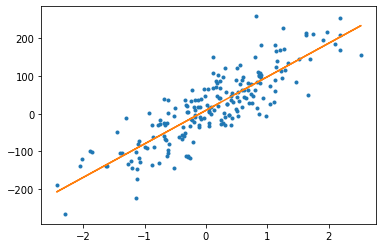

In [ ]:
y_pred = model.predict(x)
plt.plot(x,y,'.',x,y_pred)